In [1]:
station_data.sel(time=slice("2020-10-03","2020-10-04")).temperature.plot()

NameError: name 'station_data' is not defined

## 3. Fire Weather Index Calculator
The fwi calculator provided in this lab has been adapted to New Zealand based on lattitude and longitude. Make sure that the temperature is in ***degree celsius***, the relative humidity is between 0 and 100,and precipitation's unit is mm. Also make sure to input the wind speed unit (either "m/s" or "km/h" depends on the data). The four atmospheric variables required for the FWI are temperature, relative humidity, wind speed and precipitation. Make sure you enter the input using the exact order. The default initial values used for the indices are ```ffmc0=85.0,dmc0=6.0,dc0=15.0```. You can also change these initial values by providing them in the input. The code below can also handle multiple stations or spatial data like WRF output.

In [1]:
import xarray as xr
import fwi_nz as fwi_calc
import numpy as np

In [2]:
station_data=xr.open_dataset('AWS_Data.nc')

In [6]:
station_data

<xarray.Dataset>
Dimensions:            (geometry: 1, height: 1, time: 44982)
Coordinates:
  * geometry           (geometry) object '010100000085B185200791654005A8A9656...
  * height             (height) int8 2
  * time               (time) datetime64[ns] 2017-02-20T23:00:00 ... 2022-05-12
Data variables:
    externalId         (geometry) object ...
    lat                (geometry) float64 ...
    lon                (geometry) float64 ...
    name               (geometry) object ...
    ref                (geometry) object ...
    station_id         (geometry) object ...
    wind_speed         (geometry, height, time) float32 ...
    wind_direction     (geometry, height, time) float32 ...
    temperature        (time, geometry, height) float32 ...
    relative_humidity  (time, geometry, height) float32 ...
    precipitation      (time, geometry, height) float32 ...
Attributes:
    result_type:     time_series
    title:           mean wind_speed in m/s of the atmosphere by a sensor_rec...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

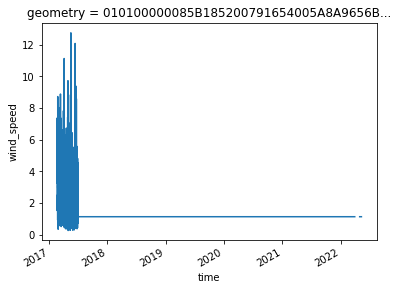

In [7]:
station_data.wind_speed.plot()

In [11]:
%%time
ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    station_data.temperature,
    station_data.relative_humidity,
    station_data.wind_speed,
    station_data.precipitation,
    start_date="2017-02-20",  ### this date will be used to initilized the parameters
    end_date = "2022-05-12",
    ws_unit="m/s"
)

CPU times: user 33.2 s, sys: 548 ms, total: 33.7 s
Wall time: 33.2 s


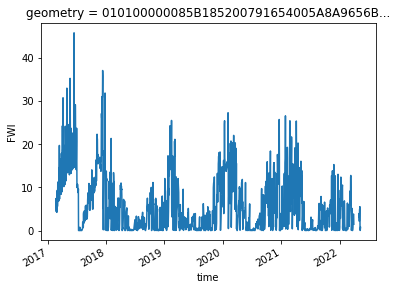

In [12]:
fwi_data.plot()

## Task
1. Calculate FWI from the numericla weather model database ... more instructions provided in the lab

In [15]:
ls /mnt/Metservice_WRF/

GLW_20000101000000.nc*     RH_20131201000000.nc*      TD_20070101000000.nc*
GLW_20000201000000.nc*     RH_20140101000000.nc*      TD_20070201000000.nc*
GLW_20000301000000.nc*     RH_20140201000000.nc*      TD_20070301000000.nc*
GLW_20000401000000.nc*     RH_20140301000000.nc*      TD_20070401000000.nc*
GLW_20000501000000.nc*     RH_20140401000000.nc*      TD_20070501000000.nc*
GLW_20000601000000.nc*     RH_20140501000000.nc*      TD_20070601000000.nc*
GLW_20000701000000.nc*     RH_20140601000000.nc*      TD_20070701000000.nc*
GLW_20000801000000.nc*     RH_20140701000000.nc*      TD_20070801000000.nc*
GLW_20000901000000.nc*     RH_20140801000000.nc*      TD_20070901000000.nc*
GLW_20001001000000.nc*     RH_20140901000000.nc*      TD_20071001000000.nc*
GLW_20001101000000.nc*     RH_20141001000000.nc*      TD_20071101000000.nc*
GLW_20001201000000.nc*     RH_20141101000000.nc*      TD_20071201000000.nc*
GLW_20010101000000.nc*     RH_20141201000000.nc*      TD_20080101000000.nc*
GLW_20010201

In [21]:
T = xr.open_dataset("/mnt/Metservice_WRF/T_20201201000000.nc")

In [22]:
U = xr.open_dataset("/mnt/Metservice_WRF/U_20201201000000.nc")

In [23]:
V = xr.open_dataset("/mnt/Metservice_WRF/V_20201201000000.nc")

In [24]:
RH = xr.open_dataset("/mnt/Metservice_WRF/RH_20201201000000.nc")

In [25]:
RAINNC = xr.open_dataset("/mnt/Metservice_WRF/RAINNC_20201201000000.nc")

Step 2

In [26]:
v = V["V"]

In [27]:
u = U["U"]

In [31]:
WS = np.sqrt(u**2 + v**2)

In [33]:
def WS_calc(u, v):
    WS = np.sqrt(u**2 + v**2)
    return WS